In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Patch
from datetime import datetime, timedelta

#sns.set_style('whitegrid', {'font.sans-serif':'Laksaman'})

In [55]:
dr = pd.read_csv("./datasets_clean/all_reactors.csv")

#dr = da.sort_values(by='Start')[0:100].copy(deep=True)

## Add order for plotting
dr['current_num'] = np.arange(len(dr))
dr['ctime_y'] = dr["Construction_time"]/365.0

##
mintime = datetime.strptime(min(dr['Start']), "%Y-%m-%d")
maxtime = datetime(2020, 12, 31)

dr['ctime_start'] = (pd.to_datetime(dr['Start']) - mintime).dt.days/365.0

lendays = (maxtime-mintime).days
leny = lendays/365
dr = dr.sort_values(by='Start', ascending=False)

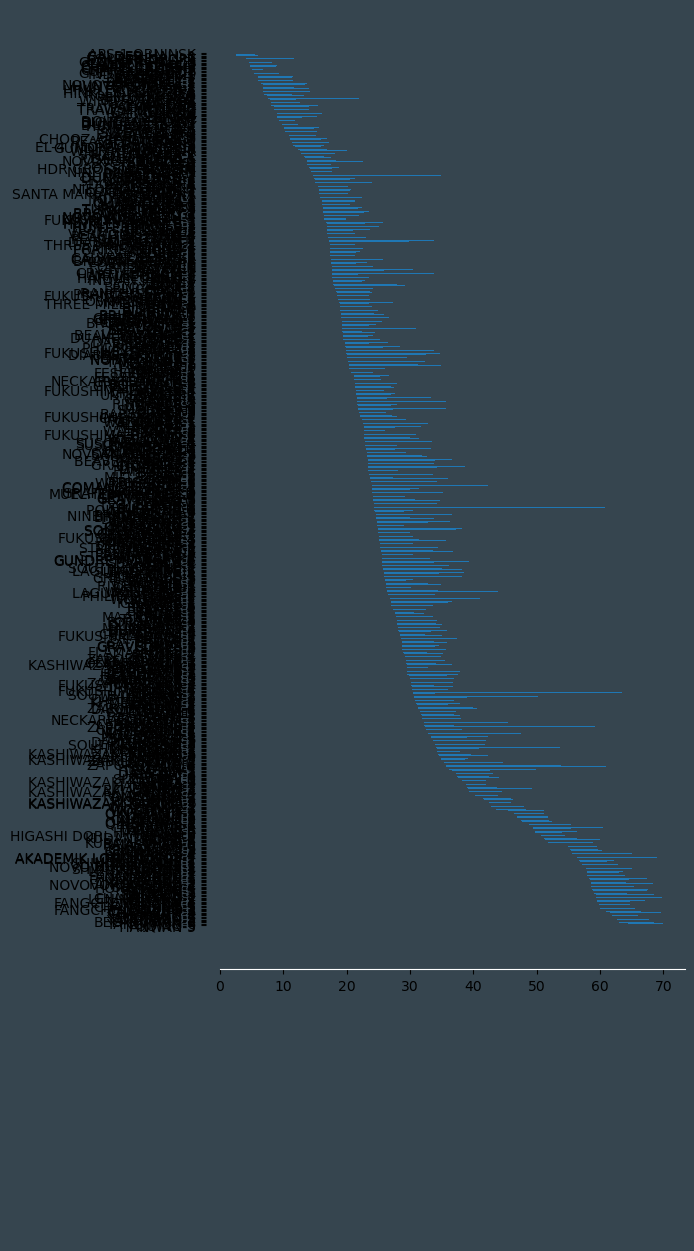

In [62]:
##### PLOT #####
fig, (ax, ax1) = plt.subplots(2, figsize=(6,16), gridspec_kw={'height_ratios':[6, 1]}, facecolor='#36454F')
ax.set_facecolor('#36454F')
ax1.set_facecolor('#36454F')
# bars
ax.barh(dr.Name, dr.ctime_y, left=dr.ctime_start, height=0.4)#, left=dr.Start)#, color=df.color)
#ax.barh(dr.Start, df.days_start_to_end, left=df.start_num, color=df.color, alpha=0.5)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('w')
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_xticks([])
ax1.set_yticks([])

plt.show()

[]

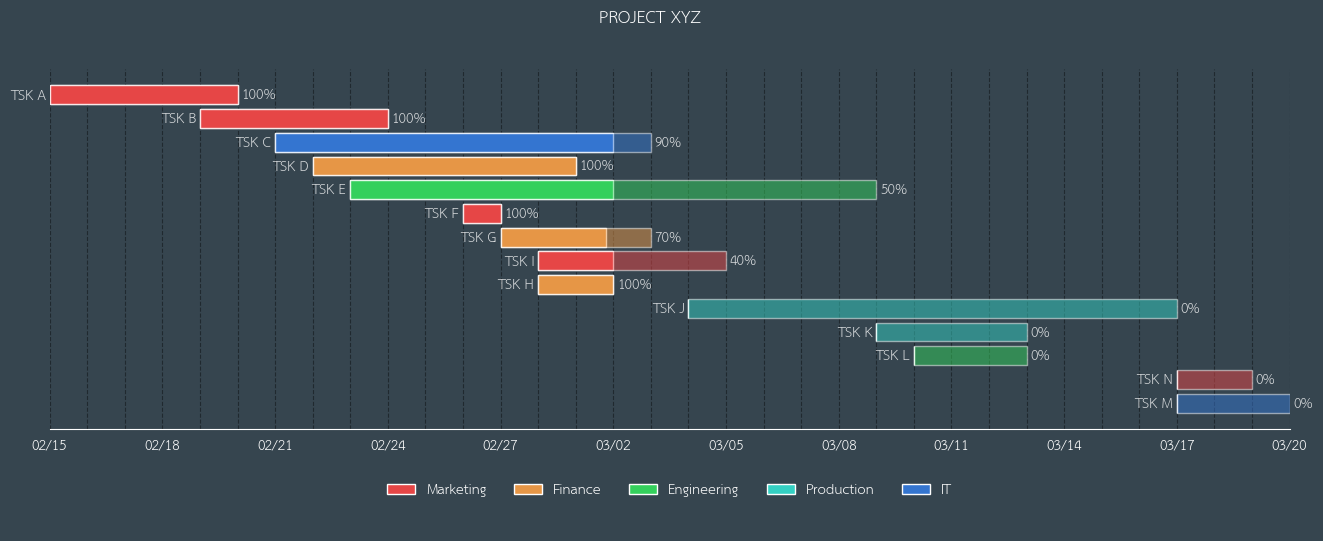

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from pandas import Timestamp

##### DATA #####
data = {'Task': {0: 'TSK M',
                 1: 'TSK N',
                 2: 'TSK L',
                 3: 'TSK K',
                 4: 'TSK J',
                 5: 'TSK H',
                 6: 'TSK I',
                 7: 'TSK G',
                 8: 'TSK F',
                 9: 'TSK E',
                 10: 'TSK D',
                 11: 'TSK C',
                 12: 'TSK B',
                 13: 'TSK A'},

 'Department': {0: 'IT',
                1: 'MKT',
                2: 'ENG',
                3: 'PROD',
                4: 'PROD',
                5: 'FIN',
                6: 'MKT',
                7: 'FIN',
                8: 'MKT',
                9: 'ENG',
                10: 'FIN',
                11: 'IT',
                12: 'MKT',
                13: 'MKT'},
 
 'Start': {0: Timestamp('2022-03-17 00:00:00'),
           1: Timestamp('2022-03-17 00:00:00'),
           2: Timestamp('2022-03-10 00:00:00'),
           3: Timestamp('2022-03-09 00:00:00'),
           4: Timestamp('2022-03-04 00:00:00'),
           5: Timestamp('2022-02-28 00:00:00'),
           6: Timestamp('2022-02-28 00:00:00'),
           7: Timestamp('2022-02-27 00:00:00'),
           8: Timestamp('2022-02-26 00:00:00'),
           9: Timestamp('2022-02-23 00:00:00'),
           10: Timestamp('2022-02-22 00:00:00'),
           11: Timestamp('2022-02-21 00:00:00'),
           12: Timestamp('2022-02-19 00:00:00'),
           13: Timestamp('2022-02-15 00:00:00')},
 
 'End': {0: Timestamp('2022-03-20 00:00:00'),
         1: Timestamp('2022-03-19 00:00:00'),
         2: Timestamp('2022-03-13 00:00:00'),
         3: Timestamp('2022-03-13 00:00:00'),
         4: Timestamp('2022-03-17 00:00:00'),
         5: Timestamp('2022-03-02 00:00:00'),
         6: Timestamp('2022-03-05 00:00:00'),
         7: Timestamp('2022-03-03 00:00:00'),
         8: Timestamp('2022-02-27 00:00:00'),
         9: Timestamp('2022-03-09 00:00:00'),
         10: Timestamp('2022-03-01 00:00:00'),
         11: Timestamp('2022-03-03 00:00:00'),
         12: Timestamp('2022-02-24 00:00:00'),
         13: Timestamp('2022-02-20 00:00:00')},
 
 'Completion': {0: 0.0,
                1: 0.0,
                2: 0.0,
                3: 0.0,
                4: 0.0,
                5: 1.0,
                6: 0.4,
                7: 0.7,
                8: 1.0,
                9: 0.5,
                10: 1.0,
                11: 0.9,
                12: 1.0,
                13: 1.0}}


##### DATA PREP ##### 
df = pd.DataFrame(data)

# project start date
proj_start = df.Start.min()

# number of days from project start to task start
df['start_num'] = (df.Start-proj_start).dt.days

# number of days from project start to end of tasks
df['end_num'] = (df.End-proj_start).dt.days

# days between start and end of each task
df['days_start_to_end'] = df.end_num - df.start_num

# days between start and current progression of each task
df['current_num'] = (df.days_start_to_end * df.Completion)

# create a column with the color for each department
def color(row):
    c_dict = {'MKT':'#E64646', 'FIN':'#E69646', 'ENG':'#34D05C', 'PROD':'#34D0C3', 'IT':'#3475D0'}
    return c_dict[row['Department']]

df['color'] = df.apply(color, axis=1)

##### PLOT #####
fig, (ax, ax1) = plt.subplots(2, figsize=(16,6), gridspec_kw={'height_ratios':[6, 1]}, facecolor='#36454F')
ax.set_facecolor('#36454F')
ax1.set_facecolor('#36454F')
# bars
ax.barh(df.Task, df.current_num, left=df.start_num, color=df.color)
ax.barh(df.Task, df.days_start_to_end, left=df.start_num, color=df.color, alpha=0.5)

for idx, row in df.iterrows():
    ax.text(row.end_num+0.1, idx, f"{int(row.Completion*100)}%", va='center', alpha=0.8, color='w')
    ax.text(row.start_num-0.1, idx, row.Task, va='center', ha='right', alpha=0.8, color='w')


# grid lines
ax.set_axisbelow(True)
ax.xaxis.grid(color='k', linestyle='dashed', alpha=0.4, which='both')

# ticks
xticks = np.arange(0, df.end_num.max()+1, 3)
xticks_labels = pd.date_range(proj_start, end=df.End.max()).strftime("%m/%d")
xticks_minor = np.arange(0, df.end_num.max()+1, 1)
ax.set_xticks(xticks)
ax.set_xticks(xticks_minor, minor=True)
ax.set_xticklabels(xticks_labels[::3], color='w')
ax.set_yticks([])

plt.setp([ax.get_xticklines()], color='w')

# align x axis
ax.set_xlim(0, df.end_num.max())

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('w')



plt.suptitle('PROJECT XYZ', color='w')

##### LEGENDS #####
legend_elements = [Patch(facecolor='#E64646', label='Marketing'),
                   Patch(facecolor='#E69646', label='Finance'),
                   Patch(facecolor='#34D05C', label='Engineering'),
                   Patch(facecolor='#34D0C3', label='Production'),
                   Patch(facecolor='#3475D0', label='IT')]

legend = ax1.legend(handles=legend_elements, loc='upper center', ncol=5, frameon=False)
plt.setp(legend.get_texts(), color='w')

# clean second axis
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_xticks([])
ax1.set_yticks([])



In [12]:
df

,Task,Department,Start,End,Completion,start_num,end_num,days_start_to_end,current_num,color
0,TSK M,IT,2022-03-17,2022-03-20,0.0,30,33,3,0.0,#3475D0
1,TSK N,MKT,2022-03-17,2022-03-19,0.0,30,32,2,0.0,#E64646
2,TSK L,ENG,2022-03-10,2022-03-13,0.0,23,26,3,0.0,#34D05C
3,TSK K,PROD,2022-03-09,2022-03-13,0.0,22,26,4,0.0,#34D0C3
4,TSK J,PROD,2022-03-04,2022-03-17,0.0,17,30,13,0.0,#34D0C3
5,TSK H,FIN,2022-02-28,2022-03-02,1.0,13,15,2,2.0,#E69646
6,TSK I,MKT,2022-02-28,2022-03-05,0.4,13,18,5,2.0,#E64646
7,TSK G,FIN,2022-02-27,2022-03-03,0.7,12,16,4,2.8,#E69646
8,TSK F,MKT,2022-02-26,2022-02-27,1.0,11,12,1,1.0,#E64646
9,TSK E,ENG,2022-02-23,2022-03-09,0.5,8,22,14,7.0,#34D05C
